# Final exam (Individual)


### <p style="text-align: right;"> &#9989; Richard Arbury</p>
### <p style="text-align: right;"> &#9989; arburyri</p>

# CMSE 202 Final (Fall 2022)

The goal of this final is to give you the opportunity to test out some of the skills that you've developed having now finished CMSE 202. In particular, you'll be committing and pushing repository changes to a GitHub repository, working with data to build a network graph, performing regression analysis, and classifying data using a machine learning classifier. You should find that you have all of the skills necessary to complete this exam having completed the second half of CMSE 202!

You are encouraged to look through the entire exam before you get started so that you can appropriately budget your time and understand the broad goals of the exam. Once you've read through it, you'll probably want to make sure you do Part 1 first to ensure that your GitHub repository is working correctly. Let your instructor know right away if you run into issues!

The exam is set up so that even if you get stuck on one part there are opportunities to get points on the other parts, so consider jumping ahead if you feel like you aren't making progress and then come back later if you have time.

If you have any questions during the exam, you may ask the instructor, the TA, or the LA privately. If you are attending in-person, simply raise your hand and one of us will come over to you. If you are attending via-Zoom, please use the ask-for-help feature or privately message the instructor, the TA, or the LA. We will make any announcements or exam clarifications/corrections to the class via the following Google Document.

[LINK](https://docs.google.com/document/d/16x_nbg8coBwf9hyLXRxOXAvrugkRhjeaBQJMiUwdBw8/edit?usp=sharing)

**Important note about using online resources**: This exam is "open internet". That means that you can look up documentation, google how to accomplish certain Python tasks, etc. Being able to effectively use the internet for computational modeling and data science is a very important skill, so we want to make sure you have the opportunity to exercise that skill. **However**: The use of any person-to-person communication software is absolutely not acceptable. If you are seen accessing your email, using a chat program (e.g. Slack), or any sort of collaborative cloud storage or document software (e.g. Google Documents other than the one we will make announcements on), you will be at risk for receiving a zero on the exam.

**Keep your eyes on your screen!** This exam is designed to give *you* the opportunity to show the instructor what you can do and you should hold yourself accountable for maintaining a high level of academic integrity. If any of the instructors observe suspicious behavior, you will, again, risk receiving a zero.

------
<a id="toc"></a>

## Table of contents


0. [Part 0: Upgrade packages](#part0) (1 point)

1. [Part 1: Git](#part1) (9 points)

2. [Part 2: Data Preprocessing](#part2) (20 points)

3. [Part 3: Regression](#part3) (15 points)

4. [Part 4: Principal Component Analysis](#part4) (12 points)

5. [Part 5: Support Vector Machines](#part5) (15 points)

6. [Part 6: Regression Redux](#part6) (7 points)

7. [Part 7: Conceptual Questions](#part7) (14 points)

8. [Part 8: Conclusion](#conclusion) (3 points)

In [1]:
grades = [1, 9, 20, 15, 12, 15, 7, 14, 3]

print(f"The total grade for this final is {sum(grades)}" )

The total grade for this final is 96


---
<a id="part0"></a>
[Back to ToC](#toc)

# Part 0: Upgrade Packages

**&#9989; Question 0.1 (1 point)**: Run the cell below. Do you have the correct packages ? If not upgrade them. **You must do this in order to avoid issues in the rest of the notebook.**


In [2]:

# Standard libraries
%pylab
%matplotlib inline

import seaborn as sns
import pandas as pd

# Data cleaning Libraries
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.utils import resample
# Classifier Libraries
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn import svm

import statsmodels.api as sm 

from sklearn import __version__ as sk_version
sns.set_context("talk")

print(f"Sklearn version should be 1.1.3 and I have {sk_version}")


Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib
Sklearn version should be 1.1.3 and I have 1.1.3


---
<a id="part1"></a>
[Back to ToC](#toc)

## Part 1: Git (9 points)

For this assignment, you're going to add it to the `cmse202-f22-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Question 1.1 (1 point)**: Navigate to your `cmse202-f22-turnin` **local** repository and create a new directory called `final` and copy this notebook in that new directory.

``` bash
mkdir final

```


&#9989; **Question 1.2 (3 points)** Check the status of your local `git`.

``` bash 
git status

```
Copy and paste below the output of the command.

``` bash
Your branch is up to date
```

What is the name of the branch you are in ? 

``` bash
git branch

main*
```

**Important:** You should be in the `main` branch. If you are not switch to the `main` branch

&#9989; **Question 1.3 (3 points):**
Add your name and GitHub username to the top of the notebook, then add and commit **ONLY** the notebook.

``` bash
git add final
git commit -m "final1"
```

What is the commit message you used ?

``` bash
final1
```

&#9989; **Question 1.4 (1 point):** Before moving on. Check that the notebook you are working on is the correct one. Run the following cell. **Are you in the new folder you just created?** If not close this notebook and open the one in the `final` folder


In [3]:
!pwd

/home/arburyri/cmse202-f22-turnin/final


&#9989; **Question 1.5 (1 point):** Finally push the updated notebook to GitHub.

``` bash
git push
```


**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f22-turnin`" repository inside the `final` directory that you just created.


---
<a id="part2"></a>
[Back to ToC](#toc)

# Part 2. Data preprocessing (19 points)

For this assignment we’re going to be working with a dataset that contains measurements of the characteristics of multiple wines. This includes things like the acidity and density. You’ll be asked to use this information, along with the machine learning tools that we’ve used in class, to determine whether the wine type is Red or White.

The dataset is located at:
`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/data/winequality.csv`


**&#9989; Question 2.1 (4 points):** Do this

1. Download the data and type the command you used to download the data

2. Read the `winequality.csv` file into a dataframe

3. Print out the **unique** labels in the `type` column. 

4. Display the first 10 rows of the dataset.

**Note**: each row represents one data point and each column (except the `type` column) represents one feature. The `type` column corresponds to the class labels for every data point. There are two types of unique class labels in the `type` column. 

In [4]:
!curl -O "https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F22-data/main/data/winequality.csv"


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  381k  100  381k    0     0  75948      0  0:00:05  0:00:05 --:--:-- 86442


In [5]:
winedf = pd.read_csv("winequality.csv")
print(winedf["type"].unique())


['white' 'red']


In [6]:
winedf.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


**&#9989; Question 2.2 (7 points):** Do the following:


2. Replace all of the strings in your `type` column with integers based on the following:

1. Drop the `NaN` in the dataset

2. Drop the `quality` column
    | original type | integer type |
    | -------- | -------- |
    | white | 0 |
    | red | 1 |

3. Once you've replaced the labels, display your DataFrame and confirm that it looks correct.

In [7]:
wine = {'white': 0,'red': 1}
winedf.type=[wine[color] for color in winedf.type]


In [8]:
winedf=winedf.dropna()

In [9]:
winedf.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6491,1,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,1,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


**&#9989; Question 2.3 (2 points):** As we've seen, when working with `scikit-learn` it can be much easier to work with the data if we have separate variables: one that stores the feature matrix and one that stores the class labels.

**Do This:** Split your DataFrame so that you have two separate DataFrames: (1) one called `features`, which contains all columns of features; and (2) one called `labels`, which is a single-column dataframe that contains all of the *new* integer labels you just created. 

In [10]:
labels=winedf["type"]
features=winedf.drop(["type"],axis=1)



**&#9989; Question 2.4 (1 points):** Do this:

We need to scale the data. This isn't something we've talked very much about in-class, so we don't expect you to know exactly what is happening here. But it will be important for our PCA later on in the assignment. We decided to put it here so you were aware of it's existence. 

**Run the following bit of code below.**

In [11]:
features = pd.DataFrame(PowerTransformer().fit_transform(features), 
                            columns=features.columns, 
                            index=features.index)

**&#9989; Question 2.5 (3 points):** Do this:

1. Split your data into a training and a testing set with a training set representing 75% of your data. For reproducibility , set the `random_state` argument to `314159`. 

2. Print the lengths to show you have the right number of entries for the training and testing sets.

In [12]:
train_vectors, test_vectors, train_labels, test_labels=train_test_split(features, labels,test_size=0.25,random_state=314159)

In [13]:
train_labels

5687    1
549     0
3958    0
386     0
4377    0
       ..
3676    0
2409    0
1525    0
2839    0
3109    0
Name: type, Length: 4847, dtype: int64

In [14]:
train_vectors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
5687,1.180898,1.597531,-1.034481,-0.269389,1.641557,-0.414082,0.095580,1.981054e-15,-0.786383,0.106812,-1.062959,-0.934513
549,0.183024,0.989431,2.130568,1.183128,0.050064,2.061240,1.311481,1.752071e-15,-0.312812,-0.787425,-1.857856,-0.934513
3958,-1.688323,-1.212892,-0.883093,0.790484,-0.060267,0.452918,-0.060550,-1.353084e-16,0.320015,-0.891558,-0.828375,0.232781
386,-2.744623,-1.415067,1.600348,-1.096645,-1.682639,-0.218705,0.026396,-2.515349e-15,1.553235,-1.109150,0.412081,1.333569
4377,-0.506894,-2.021698,-0.297545,-0.406910,-0.916976,0.244951,-0.667954,-1.998401e-15,0.009768,1.497614,0.809209,0.232781
...,...,...,...,...,...,...,...,...,...,...,...,...
3676,-2.183349,-0.011794,-0.085707,-1.365093,-1.409200,-0.156551,-0.360424,-4.669876e-15,0.618537,-0.998762,2.031810,1.333569
2409,0.094017,-0.902718,-0.226484,-0.359305,-0.994275,-0.282281,-0.043118,-3.365364e-16,0.849298,0.905976,-0.105800,-2.184624
1525,0.183024,-0.274594,2.637708,1.357144,-0.767703,0.966426,0.721765,2.036565e-15,-1.141285,-0.587942,-1.857856,-0.934513
2839,-1.389925,-0.787276,-0.155873,-1.691600,-0.994275,0.350615,-0.432035,-3.341077e-15,-0.445440,-1.460634,0.642054,1.333569


In [15]:
test_labels

1780    0
2494    0
4006    0
5821    1
1551    0
       ..
6322    1
4648    0
1217    0
6202    1
3626    0
Name: type, Length: 1616, dtype: int64

In [16]:
test_vectors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1780,1.062025,-1.415067,-0.015980,0.484375,0.155415,0.966426,0.621750,4.198031e-16,0.197356,-1.222842,-0.501115,-0.934513
2494,0.512081,0.069326,-0.586437,1.371692,0.256022,-0.482530,0.436934,2.182282e-15,-0.312812,-0.052782,-0.607085,-2.184624
4006,-2.011536,-1.705366,0.053315,-0.456443,-0.767703,-1.303516,-1.138563,-3.733125e-15,-1.141285,0.537446,1.568890,0.232781
5821,-0.191216,0.735284,-0.015980,1.016439,1.324104,-0.095734,-1.255789,2.112893e-15,1.017851,0.905976,-0.200552,0.232781
1551,-0.398015,-1.148268,3.942038,-1.365093,1.963874,0.878436,0.267167,-6.106227e-16,-0.786383,-2.122312,-1.857856,0.232781
...,...,...,...,...,...,...,...,...,...,...,...,...
6322,1.000050,-0.369192,0.393501,-1.180779,1.105978,-1.514797,-1.707296,1.637579e-15,0.320015,1.223164,-0.716132,0.232781
4648,-0.292846,1.541740,-0.733766,-0.979073,1.906854,0.648531,2.074711,-4.891920e-16,-0.648372,0.470314,-1.062959,-0.934513
1217,0.803149,1.541740,0.460320,1.327101,2.468448,-0.218705,1.759528,2.702699e-15,-1.896036,-0.221340,-1.185570,-0.934513
6202,0.512081,1.942902,-0.733766,-0.561850,1.396337,-0.414082,-0.815851,5.377643e-16,-0.580189,-0.587942,-1.185570,-0.934513


### &#128721; STOP
**Pause to commit your changes to your Git repository! (2 points)**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 2", and push the changes to GitHub.

---

<a id="part3"></a>
[Back to ToC](#toc)

# Part 3. Regression (15 Points)

**&#9989; Question 3.1.1 (3 points):**
Let's start making some prediction. 

1. Make a Logistic Regression model using `statsmodels` for predicting the type of wine. 

2. Print out the summary of your model fits.


In [17]:
logit_model = sm.Logit(train_labels, sm.add_constant(train_vectors))
result = logit_model.fit()
print(result.summary() )

         Current function value: 0.039545
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                   type   No. Observations:                 4847
Model:                          Logit   Df Residuals:                     4835
Method:                           MLE   Df Model:                           11
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                  0.9291
Time:                        21:33:52   Log-Likelihood:                -191.68
converged:                      False   LL-Null:                       -2704.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.5133      0.287    -15.702      0.000      -5.077      -3.950
fixed acidity            1.4086    

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**&#9989; Question 3.1.2 (2 points):** Further examine the results by  

1. printing a classification report
2. making a confusion matrix

In [18]:
logit_model = sm.Logit(train_labels, sm.add_constant(train_vectors)).fit()
const = sm.add_constant(test_vectors)

predicted=logit_model.predict(const)
predicted_labels=list(map(round,predicted))
print(classification_report(test_labels, predicted_labels))

         Current function value: 0.039545
         Iterations: 35
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1216
           1       0.99      0.99      0.99       400

    accuracy                           0.99      1616
   macro avg       0.99      0.99      0.99      1616
weighted avg       0.99      0.99      0.99      1616



/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [19]:
cm = confusion_matrix(test_labels, predicted_labels)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[1211    5]
 [   5  395]]


**&#9989; Question 3.2.1 (3 points):** Make an reduced Logistic Regression model for predicting the type of wine that uses just three parameters (two from the dataset + a constant). Print out the summary of your model fits.



In [20]:
labels1=winedf["type"]
features1=winedf[["quality","citric acid","chlorides"]]

In [21]:
features1 = pd.DataFrame(PowerTransformer().fit_transform(features1), 
                            columns=features1.columns, 
                            index=features1.index)
train_vectors1, test_vectors1, train_labels1, test_labels1=train_test_split(features1, labels1,test_size=0.25,random_state=314159)

logit_model1 = sm.Logit(train_labels1, sm.add_constant(train_vectors1)).fit()
const1 = sm.add_constant(test_vectors1)



Optimization terminated successfully.
         Current function value: 0.253597
         Iterations 8


**&#9989; Question 3.2.2 (2 points):** Same as above, examine the results of your reduced model by printing a classification report and a confusion matrix

In [22]:
predicted1=logit_model1.predict(const1)
predicted_labels1=list(map(round,predicted1))
print(classification_report(test_labels1, predicted_labels1))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1216
           1       0.85      0.81      0.83       400

    accuracy                           0.92      1616
   macro avg       0.89      0.88      0.89      1616
weighted avg       0.92      0.92      0.92      1616



In [23]:
cm1 = confusion_matrix(test_labels1, predicted_labels1)
print ("Confusion Matrix : \n", cm1)

Confusion Matrix : 
 [[1160   56]
 [  78  322]]


**&#9989; Question 3.3 (3 points):** How did you pick the best parameters?

I just looked as the lowest standard error

Alternatively, auxillary regressions would be more accurate but theres a lot of varibles

### &#128721; STOP
**Pause to commit your changes to your Git repository! (2 points)**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 3", and push the changes to GitHub.


---
<a id="part4"></a>
[Back to ToC](#toc)

# Part 4. Principal Component Analysis (12 points)

The full model uses all 12 features to predict the results. In many cases, we might need to see how close we can get with fewer features. Instead of simply removing features, we will use a Principal Component Analysis (PCA) to determine the combined features that contribute the most to the model (through their accounted variance).


**&#9989; Question 4.1 (5 points):** Run a Principle Component Analysis (PCA)

Since we only have 12 features to start with, let's see how well we can do if we try to aggressively reduce the feature count and use only **2** principle components. 

1. Using `PCA()` and the associated methods, run a principle component analysis on your `features` dataset using only 2 components. 

2. Transform the dataset into a new dataset and call it `pca_features`. 

3. Print the `explained_variance_ratio_` and its sum.

In [62]:
winedf.replace([np.inf, -np.inf], np.nan, inplace=True)
winedf=winedf.dropna()
features=winedf.drop(["type"],axis=1)
features = pd.DataFrame(PowerTransformer().fit_transform(features), 
                            columns=features.columns, 
                            index=features.index)

x = features.values

y = winedf.loc[:,['type']].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
Components = pca.fit_transform(x)
principalDf = pd.DataFrame(data = Components)
pca_features = pd.concat([principalDf, winedf[['type']]], axis = 1)
print(pca.explained_variance_ratio_)
total_variance = np.sum(pca.explained_variance_ratio_)*100
print(total_variance)

[0.26372782 0.22443511]
48.81629363475885


&#9989; **Question 4.1.1 (2 points):** What is the **total** explained variance ratio captured by the 2 principle components? (just quote the number) How well do you think a model with these many features will perform? Why?

48.8% of variance was explained. 

The model will not preform well, I think it bottle necks with 12 features and two components

**&#9989; Question 4.2 (3 points):** Do the following:

1. Split your new features (`pca_features`) and corresponding labels (the labels are the same as before) into a training and a testing set, with the training set representing 75% of your data. For reproducibility, set the `random_state` argument to `314159`. 

2. Print the lengths to show you have the right number of entries.

Basically do the same you have done in Q2.5 but with the `pca_features` dataset now.

In [63]:
labels=pca_features['type']
pca_features=pca_features.drop(['type'],axis=1)
##train_vectors, test_vectors, train_labels, test_labels=train_test_split(pca_features,labels,test_size=0.25,random_state=314159)

In [64]:
train_vectors2, test_vectors2, train_labels2, test_labels2=train_test_split(pca_features,labels,test_size=0.25,random_state=314159)

In [65]:
train_vectors2

,0,1
3939,0.750764,0.056581
6456,2.385134,-2.716573
3036,-1.831009,-1.350157
3940,-1.422997,0.190410
5198,3.202605,1.065750
...,...,...
3650,-2.208239,-4.047616
2385,0.240979,-0.138694
1501,-1.270813,3.319462
2815,-2.150345,-2.585743


In [57]:
test_vectors2

,component 1,component 2
2821,-1.128734,-1.074800
5480,1.946507,1.319697
2010,0.471140,-1.038912
542,-1.600458,1.729770
3522,-1.197440,-1.281387
...,...,...
1249,0.301048,-0.604543
2901,-2.540532,-0.307936
2033,-0.626591,-1.496974
317,-1.374908,2.049971


In [58]:
train_labels2

3939    0.0
6456    1.0
3036    0.0
3940    0.0
5198    1.0
       ... 
3650    0.0
2385    0.0
1501    0.0
2815    0.0
3083    0.0
Name: type, Length: 4871, dtype: float64

In [59]:
test_labels2

2821    0.0
5480    1.0
2010    0.0
542     0.0
3522    0.0
       ... 
1249    0.0
2901    0.0
2033    0.0
317     0.0
5802    1.0
Name: type, Length: 1624, dtype: float64

---
### &#128721; STOP
**Pause to commit your changes to your Git repository! (2 points)**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 4".

---

---
<a id="part5"></a>
[Back to ToC](#toc)

# Part 5. Support Vector Machine (15 points)

Let's see how an SVM performs

**&#9989; Question 5.1 (9 points):** Do the following:

1. Build a `SVC` model with a `linear` kernel. (2 points), 

2. Use `GridSearchCV` to find the best `C` parameter from this list: `'C':[0.0001, 0.001, 0.1, 1, 10]`, (2 points)
  
3. **Fit** the above model on the training set and **print** the best estimator (2 points)

4. Use your best estimator on the test dataset to make prediction. (1 point)

5. Print a [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), based on its performance on the testing dataset. (1 point)

6. Print the [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) on the testing dataset  (1 point)

**Note:** You can set the `GridSearchCV` keyword argument `n_jobs = -1` to speed things up (this allows the process to run on multiple cores.)

**Note:** If `GridSearchCV` is slow you can use the built-in model `LinearSVC` in `sklearn`. This is the same as `SVC(kernel = 'linear')` but it is faster. 

In [31]:
wine = {'white': 0,'red': 1}
winedf=winedf.dropna()
labels=winedf["type"]
features=winedf.drop(["type"],axis=1)
Xtrain, Xtest, Ytrain, Ytest=train_test_split(features,labels,test_size=0.25,random_state=314159)

scaler=StandardScaler()

scalerXtrain=scaler.fit_transform(Xtrain)
scalerXtest=scaler.transform(Xtest)


In [32]:
parameters = {'kernel':('linear', 'rbf'), 'C':[0.0001, 0.001, 0.1, 1, 10]}
my_model=svm.SVC()
clf = GridSearchCV(my_model, parameters)
fitted=clf.fit(scalerXtrain,Ytrain)

SVC(C=10)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1216
           1       0.99      0.99      0.99       400

    accuracy                           1.00      1616
   macro avg       1.00      0.99      1.00      1616
weighted avg       1.00      1.00      1.00      1616



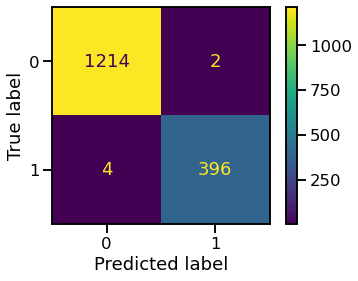

In [33]:
pred_labels = fitted.predict(scalerXtest)
print(fitted.best_estimator_)
print(classification_report(Ytest, pred_labels))
ConfusionMatrixDisplay.from_estimator(fitted, scalerXtest, Ytest)

**&#9989; Question 5.1.1 (4 points):** Answer the following questions:

1. The model had an accuracy of 100%, which means somethings wrong with my model I feel

2. Not much better, 99% vs 100%. But i think I did something wrong with this model

---
### &#128721; STOP
**Pause to commit your changes to your Git repository! (2 points)**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 5".

---

<a id="part3"></a>
[Back to ToC](#toc)

# Part 6. Regression Redux (7 Points)

**&#9989; Question 6.1.1 (3 points):** Let's investigate the Logistic model again and see how it performs on the new PCA-transformed dataset. 

**Do this**: Make an Logistic model using the PCA features (2 features + constant). You should add a constant to the two PCA features, giving you three total features.


logit_model2 = sm.Logit(train_labels2, sm.add_constant(train_vectors2))
result = logit_model2.fit()
print(result.summary() )
const2 = sm.add_constant(test_vectors2)

predicted2=logit_model2.predict(const2)
predicted_labels2=list(map(round,predicted2))

So I dont know how I get inf or nans when i removed all of them at once in the begining on line 53, thats dumb what the hell is the dropna suppose to do then?

**&#9989; Question 6.1.2 (2 points):**  Examine the results by making a confusion matrix (2 Points)


cm2 = confusion_matrix(test_labels2, predicted_labels2)
print ("Confusion Matrix : \n", cm2)

---
### &#128721; STOP
**Pause to commit your changes to your Git repository! (2 points)**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 6".

---

---
<a id="part7"></a>
[Back to ToC](#toc)

# Part 7. Conceptual Questions (14 Points)

**&#9989; Question 7.1 (4 points):** Compare your results from 3.2.2 and 6.1.2, two Logistic regression models that used the three most significant features. Which one performed better? Why? Your explanation should discuss the difference between the features in the two models and how that difference might affect how well the model fits the data.  

I'm assuming the model in 3.2.2 did because it had very high accuracy (92%). It also used features with the lowest SE, which means it had more reliable means. I counld't get 6.1.2 to work and I'm really annoyed, by the PCA model would have used probalties between 0 and 1

#### 7.2 
The following questions probe your understanding of  `recall` and `precision`. You’ll be given a specific scenario, and you will need to decide whether to select a Machine Learning model that maximizes `recall` or `precision`.


**&#9989; Question 7.2 (4 points):**  A new disease has been detected in Sweden. Doctors have taken multiple measurements of patients and passed them along to you. You’ve tested various models to predict which patients have the new disease. The Swedish health experts have told you it is critical that they identify **all** of the patients with the new disease so they can put them into quarantine. They tell you that it doesn’t matter if your model accidentally flags some people as having the disease even when they don’t, as it’s much better to tell people who aren’t sick to quarantine than to tell a sick person they don’t need to quarantine.

Given this situation, should you choose the model that maximizes `recall` or the model that maximizes `precision`? Why?

Recall, because it will consider false neagtives. If it lets false negatives go here, people could die, so precision is a bad choice.

**&#9989; Question 7.2.2 (4 points):**
You are working for the state of Michigan, helping them with their new unemployment insurance program. You’ve created various models that are meant to detect fraud–i.e., determine whether or not someone applied for unemployment insurance when they shouldn’t have. Your boss tells you that it’s critical that your model doesn’t accidentally accuse an innocent person of fraud. They say it’s fine if your model misses some people who committed fraud as long as there are no false accusations. 

Given this situation, should you choose the model that maximizes `recall` or the model that maximizes `precision`? Why?

Precision is best here, as the circumstances are reversed from the last example. You do not want false negatives to be relevant here.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!** (2 points)

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 7".

---

---
<a id="conclusion"></a>
[Back to ToC](#toc)

# Part 8. Conclusion (3 points)

Make sure all of your changes to your repository are committed and pushed to GitHub. 
Before you leave

1. Have you added your name and github username at the top of this notebook? ? (1 point)

2. Push the changes to your GitHub repository (1 point)

3. Upload your notebook to D2L in case something went wrong with your repository or if you couldn't get the repository to work.  (1 point)

## You're done! Congrats on finishing your CMSE 202 Midterm!

In [ ]:

# FINAL GRADE (Instructor's use only)",
parts = [part_0, part_1, part_2, part_3, part_4, part_5, part_6, part_7]
print(f"Part 0: {part_0}/{grades[0]}")
print(f"Part 1: {part_1}/{grades[1]}")
print(f"Part 2: {part_2}/{grades[2]}")
print(f"Part 3: {part_3}/{grades[3]}")
print(f"Part 4: {part_4}/{grades[4]}")
print(f"Part 5: {part_5}/{grades[5]}")
print(f"Part 6: {part_6}/{grades[6]}")
print(f"Part 7: {part_7}/{grades[7]}")

total = sum(parts)
print(f"Your final grade is {total}")

&#169; Copyright 2022,  Department of Computational Mathematics, Science and Engineering at Michigan State University